<a target="_blank" href="https://colab.research.google.com/github/lukebarousse/Python_Data_Analytics_Course/blob/main/4_Problems/2_18_Matplotlib Box Plots.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [11]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

### example from video

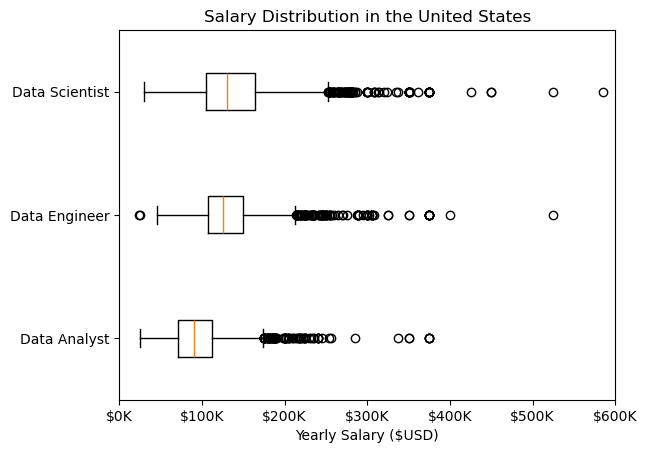

In [12]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()

df_US = df_US.dropna(subset=['salary_year_avg'])

job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, labels=job_titles, vert=False)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0, 600000)
plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
plt.show()

## 🟩 Data Scientist Hourly Salary Box Plot (2.18.1)

In [18]:
df_DS_US = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')].copy()
df_DS_US = df_DS_US.dropna(subset=['salary_hour_avg'])

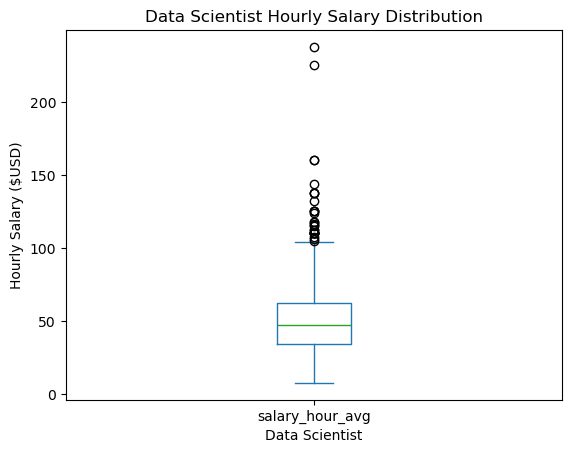

In [21]:
df_DS_US['salary_hour_avg'].plot(kind='box')
plt.title('Data Scientist Hourly Salary Distribution')
plt.xlabel('Data Scientist')
plt.ylabel('Hourly Salary ($USD)')
plt.show()

---

## 🟨 Comparison of Hourly Salaries for Data Analyst (2.18.2)

In [15]:
# Code Needed
countries = ['United States', 'Canada']

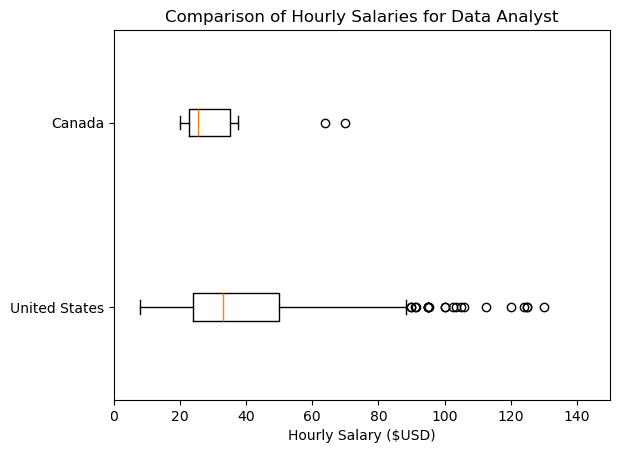

In [27]:
df_DA = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'].isin(countries))].dropna(subset=['salary_hour_avg']).copy()

country_list = [df_DA[df_DA['job_country'] == country]['salary_hour_avg'] for country in countries]

plt.boxplot(country_list, labels=countries, vert=False)
plt.xlim(0, 150)
plt.xlabel('Hourly Salary ($USD)')
plt.title('Comparison of Hourly Salaries for Data Analyst')
plt.show()

---

## 🟥 Comparison of Hourly Salaries in Canada (2.18.3)

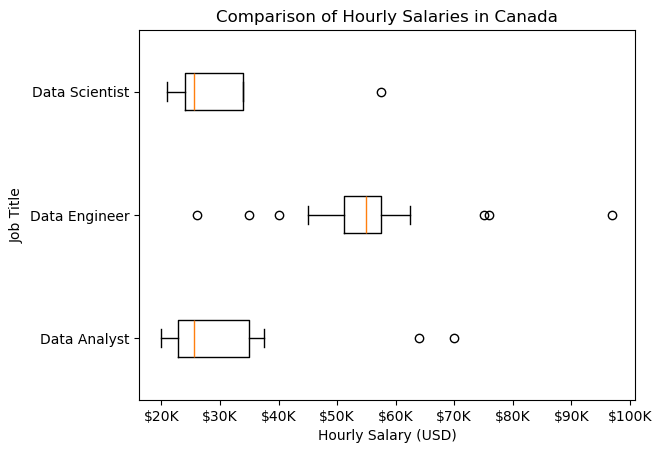

In [31]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_CA = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'Canada')].dropna(subset=['salary_hour_avg']).copy()

job_list_1 = [df_CA[df_CA['job_title_short'] == job_title]['salary_hour_avg'] for job_title in job_titles]

plt.boxplot(job_list_1, labels=job_titles, vert=False)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x)}K'))
plt.title('Comparison of Hourly Salaries in Canada')
plt.ylabel('Job Title')
plt.xlabel('Hourly Salary (USD)')
plt.show()



---